## Setup

In [1]:
# carregamento das bibliotecas
import sys
import os
import pandas as pd 
from datetime import date, timedelta
# Adiciona a pasta raiz do projeto (onde está a pasta src) ao sys.path
sys.path.append(os.path.abspath(os.path.join("..")))
from src.config.logging_config import setup_logging
from src.data.load_data import carregar_dataset
from src.etl.webscrapping import gerar_tabela_cotacao_diaria_ibovespa
from src.data.preprocessing import *

In [2]:
# configuração do logging
setup_logging()


## Carregamento dos dados

In [3]:
# carregamento da tabela de ações componentes do ibovespa com dados  setorais
tbl_carteira_ibovespa = carregar_dataset(path='../data/external/tbl_acoes_ibovespa.csv')
tbl_carteira_ibovespa

2025-08-08 14:58:37,821 | INFO | src.data.load_data | Captura do arquivo csv no path:../data/external/tbl_acoes_ibovespa.csv


,codigo,tipo,empresa,slug,setor,industria,ticker
0,ABEV3,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,Bebidas,ABEV3.SA
1,ALOS3,ON,Allos,alos3,Imóveis,Atividades Imobiliárias,ALOS3.SA
2,ASAI3,ON,Assaí­ Atacadista,assai-asai3,Consumo não-cíclico,Varejo de alimentos e medicamentos,ASAI3.SA
3,AURE3,ON,Auren,auren-energia-aure3,Utilidades,Empresas independentes e concessionárias elétr...,AURE3.SA
4,AZZA3,ON,Azzas 2154,azzas-2154-azza3,Consumo cíclico,Varejistas especializados,AZZA3.SA
...,...,...,...,...,...,...,...
79,CPLE6,PNB,Companhia Paranaense de Energia COPEL,copel-pnb,Utilidades,Empresas independentes e concessionárias elétr...,CPLE6.SA
80,TIMS3,ON,TIM SA,tim-part-s-a-on-nm,Tecnologia,Serviços de telecomunicação,TIMS3.SA
81,VAMO3,ON,Grupo Vamos,grupo-vamos-sa,Indústria,Serviços de frete e logística,VAMO3.SA
82,VBBR3,ON,Vibra Energia SA,petrobras-distribuidora,Energia,Gás e Petróleo,VBBR3.SA


In [4]:
# carregamento da base historica de ações componentes do ibovespa para validação dos dados
tbl_cotacao_ibovespa = carregar_dataset(path='../data/raw/tbl_acoes_ibovespa_historico_nova_rodada.csv', sep=',')
tbl_cotacao_ibovespa.tail()

2025-08-08 14:58:37,844 | INFO | src.data.load_data | Captura do arquivo csv no path:../data/raw/tbl_acoes_ibovespa_historico_nova_rodada.csv


,Date,ticker,Open,High,Low,Close,Volume,Dividends,Stock Splits,trailingPE,priceToBook,returnOnEquity,profitMargins,revenueGrowth,dividendYield,totalDebt,freeCashflow
19761,2025-07-18 00:00:00-03:00,VIVA3,24.990000,25.830000,24.430000,25.580000,8006800,0.0,0.0,8.745981,2.447804,0.31979,0.27443,0.208,2.44,1063061696,-336666272.0
19762,2025-07-21 00:00:00-03:00,VIVA3,25.580000,26.000000,25.290001,25.700001,4756700,0.0,0.0,8.745981,2.447804,0.31979,0.27443,0.208,2.44,1063061696,-336666272.0
19763,2025-07-22 00:00:00-03:00,VIVA3,25.730000,25.879999,24.790001,24.790001,3152000,0.0,0.0,8.745981,2.447804,0.31979,0.27443,0.208,2.44,1063061696,-336666272.0
19764,2025-07-23 00:00:00-03:00,VIVA3,24.700001,25.570000,24.420000,25.389999,1841600,0.0,0.0,8.745981,2.447804,0.31979,0.27443,0.208,2.44,1063061696,-336666272.0
19765,2025-07-24 00:00:00-03:00,VIVA3,25.080000,25.350000,24.910000,25.049999,1806600,0.0,0.0,8.745981,2.447804,0.31979,0.27443,0.208,2.44,1063061696,-336666272.0


In [5]:
# concatenação dos dados setoriais com a tabela de cotação
tbl_cotacao_ibovespa = tbl_cotacao_ibovespa.merge(tbl_carteira_ibovespa.drop(['ticker'], axis=1), left_on='ticker', right_on='codigo', how='left')
tbl_cotacao_ibovespa.drop(columns='codigo', axis=1, inplace=True)
tbl_cotacao_ibovespa.head()

,Date,ticker,Open,High,Low,Close,Volume,Dividends,Stock Splits,trailingPE,...,profitMargins,revenueGrowth,dividendYield,totalDebt,freeCashflow,tipo,empresa,slug,setor,industria
0,2024-08-07 00:00:00-03:00,ABEV3,11.231811,11.687784,11.203895,11.641256,48591300,0.0,0.0,13.297873,...,0.16084,0.002,7.47,3157764096,1.793802e+10,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,Bebidas
1,2024-08-08 00:00:00-03:00,ABEV3,11.594729,11.687785,11.455146,11.501673,28173200,0.0,0.0,13.297873,...,0.16084,0.002,7.47,3157764096,1.793802e+10,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,Bebidas
2,2024-08-09 00:00:00-03:00,ABEV3,11.576117,11.613339,11.455145,11.585423,19122000,0.0,0.0,13.297873,...,0.16084,0.002,7.47,3157764096,1.793802e+10,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,Bebidas
3,2024-08-12 00:00:00-03:00,ABEV3,11.631950,11.678478,11.529590,11.529590,17501300,0.0,0.0,13.297873,...,0.16084,0.002,7.47,3157764096,1.793802e+10,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,Bebidas
4,2024-08-13 00:00:00-03:00,ABEV3,11.604034,11.780839,11.548200,11.697089,30082000,0.0,0.0,13.297873,...,0.16084,0.002,7.47,3157764096,1.793802e+10,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,Bebidas


In [6]:
# tratamento dos dados da coluna industria
tbl_cotacao_ibovespa.industria = tbl_cotacao_ibovespa.industria.str.lstrip()
tbl_cotacao_ibovespa.industria .value_counts()

industria
Empresas independentes e concessionárias elétricas        2880
Gás e Petróleo                                            1920
Metais e Mineração                                        1680
Serviços bancários                                        1440
Alimentos e tabaco                                        1200
Atvidades Imobiliárias                                     960
Varejistas especializados                                  960
Seguro                                                     960
Varejo de alimentos e medicamentos                         720
Prestação de serviços de Saúde                             720
Serviços de hotel e entretenimento                         480
Serviços de frete e logística                              480
Atividades Imobiliárias                                    480
Serviços de telecomunicação                                480
Colégio, faculdade e universidade                          480
Banco de investimento e serviços associados  

In [7]:
# transformação da coluna date em index do dataset
tbl_cotacao_ibovespa.set_index('Date', drop=True, inplace=True)
tbl_cotacao_ibovespa.index = pd.to_datetime(tbl_cotacao_ibovespa.index)

# Gerar um novo historico para dados fundamentalistas para um novo processo de re-treino futuro do modelo
geram uma repetição dos dados com a execução da api, não recuperando o histórico

In [8]:
tbl_cotacao_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19766 entries, 2024-08-07 00:00:00-03:00 to 2025-07-24 00:00:00-03:00
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ticker          19766 non-null  object 
 1   Open            19766 non-null  float64
 2   High            19766 non-null  float64
 3   Low             19766 non-null  float64
 4   Close           19766 non-null  float64
 5   Volume          19766 non-null  int64  
 6   Dividends       19766 non-null  float64
 7   Stock Splits    19766 non-null  float64
 8   trailingPE      16886 non-null  float64
 9   priceToBook     19766 non-null  float64
 10  returnOnEquity  19526 non-null  float64
 11  profitMargins   19766 non-null  float64
 12  revenueGrowth   19526 non-null  float64
 13  dividendYield   17585 non-null  float64
 14  totalDebt       19766 non-null  int64  
 15  freeCashflow    18326 non-null  float64
 16  tipo            19766 non-nul

In [9]:
# nova iteração: remoção das colunas fundamentalistas,pois elas geram uma repetição dos dados com a execução da api, não recuperando o histórico
tbl_cotacao_ibovespa.drop(columns=['Dividends',
       'Stock Splits', 'trailingPE', 'priceToBook', 'returnOnEquity',
       'profitMargins', 'revenueGrowth', 'dividendYield', 'totalDebt',
       'freeCashflow'], axis=1, inplace=True)

In [10]:
# inserção de dados temporais no dataset
tbl_cotacao_ibovespa = dados_temporais(df=tbl_cotacao_ibovespa)
tbl_cotacao_ibovespa.head()


,ticker,Open,High,Low,Close,Volume,tipo,empresa,slug,setor,industria,dayofweek,month,Feriado
Date,,,,,,,,,,,,,,
2024-08-07 00:00:00-03:00,ABEV3,11.231811,11.687784,11.203895,11.641256,48591300,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,Bebidas,2,8,False
2024-08-08 00:00:00-03:00,ABEV3,11.594729,11.687785,11.455146,11.501673,28173200,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,Bebidas,3,8,False
2024-08-09 00:00:00-03:00,ABEV3,11.576117,11.613339,11.455145,11.585423,19122000,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,Bebidas,4,8,False
2024-08-12 00:00:00-03:00,ABEV3,11.631950,11.678478,11.529590,11.529590,17501300,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,Bebidas,0,8,False
2024-08-13 00:00:00-03:00,ABEV3,11.604034,11.780839,11.548200,11.697089,30082000,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,Bebidas,1,8,False


In [11]:
# transformação da colunas Feriado no formato int
tbl_cotacao_ibovespa['Feriado'] = tbl_cotacao_ibovespa['Feriado'].astype(int)

P/L (Preço sobre Lucro) (trailingPE): Quanto o mercado paga por cada real de lucro da empresa. Ajuda a ver se a ação está cara ou barata em relação ao lucro.

P/VP (Preço sobre Valor Patrimonial) (priceToBook): Compara o preço da ação com o valor contábil dos ativos da empresa. Indica se a ação está acima ou abaixo do seu valor patrimonial.

ROE (Retorno sobre o Patrimônio Líquido) (returnOnEquity): Rentabilidade da empresa sobre o capital próprio investido pelos acionistas. Um ROE alto mostra boa gestão.

Margem Líquida (profitMargins): Porcentagem da receita que se transforma em lucro líquido. Indica a eficiência da empresa em gerar lucro das vendas.

Crescimento de Receita (revenueGrowth): Aumento percentual das vendas da empresa. Essencial para avaliar a expansão e potencial de mercado.

Dividend Yield (dividendYield): Retorno em dividendos que a ação oferece em relação ao seu preço. Importante para quem busca renda passiva.

Dívida Total (totalDebt): Montante total de obrigações financeiras da empresa. Ajuda a avaliar a saúde financeira e o risco.

Fluxo de Caixa Livre (freeCashflow): Dinheiro que sobra para a empresa após todas as despesas e investimentos. Sinaliza a capacidade da empresa de gerar caixa puro.

## Análise

In [12]:
# informações da tabela
tbl_cotacao_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19766 entries, 2024-08-07 00:00:00-03:00 to 2025-07-24 00:00:00-03:00
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     19766 non-null  object 
 1   Open       19766 non-null  float64
 2   High       19766 non-null  float64
 3   Low        19766 non-null  float64
 4   Close      19766 non-null  float64
 5   Volume     19766 non-null  int64  
 6   tipo       19766 non-null  object 
 7   empresa    19766 non-null  object 
 8   slug       19766 non-null  object 
 9   setor      19766 non-null  object 
 10  industria  19766 non-null  object 
 11  dayofweek  19766 non-null  int32  
 12  month      19766 non-null  int32  
 13  Feriado    19766 non-null  int32  
dtypes: float64(4), int32(3), int64(1), object(6)
memory usage: 2.0+ MB


In [13]:
# verificação da quantidade de ações por industria
empresas_por_industria = agrupar_dados(df=tbl_cotacao_ibovespa, cols_agrup=['setor', 'industria'], cols_filter=['ticker'], agr='nunique').reset_index()
empresas_por_industria.head()

2025-08-08 14:58:38,231 | INFO | src.data.preprocessing | Agrupamento selecionado: ['setor', 'industria'], filtragem dataset:['ticker'], método: nunique


,setor,industria,ticker
0,Saúde,Prestação de serviços de Saúde,1
1,Serviços acadêmicos e educacionais,"Colégio, faculdade e universidade",1
2,Consumo cíclico,Automóveis e peças,1
3,Consumo cíclico,Serviços de hotel e entretenimento,2
4,Consumo cíclico,Varejistas especializados,4


In [14]:
industrias_por_setor = tbl_cotacao_ibovespa.groupby('setor')['industria'].nunique().reset_index(name='count_industria_setor')
industrias_por_setor

,setor,count_industria_setor
0,Saúde,1
1,Serviços acadêmicos e educacionais,1
2,Consumo cíclico,4
3,Consumo não-cíclico,5
4,Energia,1
5,Financeiro,3
6,Imóveis,2
7,Indústria,5
8,Materiais básicos,4
9,Saúde,2


In [15]:
# verificação da quantidade de ações por setor
empresas_por_setor = tbl_cotacao_ibovespa.groupby(['setor'])['ticker'].nunique().reset_index(name='count_ticker_setor')
empresas_por_setor.head()

,setor,count_ticker_setor
0,Saúde,1
1,Serviços acadêmicos e educacionais,1
2,Consumo cíclico,8
3,Consumo não-cíclico,11
4,Energia,8


In [16]:
# verificação de nulos
tbl_cotacao_ibovespa.isna().sum()

ticker       0
Open         0
High         0
Low          0
Close        0
Volume       0
tipo         0
empresa      0
slug         0
setor        0
industria    0
dayofweek    0
month        0
Feriado      0
dtype: int64

In [17]:
#valores_nulos = tbl_cotacao_ibovespa[tbl_cotacao_ibovespa.isnull().any(axis=1)][['ticker', 'trailingPE', 'dividendYield', 'freeCashflow']]
#valores_nulos.head()

# Prenchimento de nulos
Para novos dados no pipeline, usaremos o método de preenchimento ffill ou com a média movel até o dia anterior para preenchimento dos valores nulos no glue.

In [18]:
# tratamento dos valores nulos: interpolação em cascata
#tbl_cotacao_ibovespa = tratamento_nulo_dados_setor_industria(df=tbl_cotacao_ibovespa, colunas=['trailingPE','returnOnEquity','revenueGrowth','dividendYield','freeCashflow'])
#tbl_cotacao_ibovespa.head()

In [19]:
# verificação de duplicados
tbl_carteira_ibovespa.duplicated().sum()

0

In [20]:
# análise descritivos interativa dos dados
boxplot_analise_descritiva_categorica(tbl_cotacao_ibovespa,distribuicao=(0.1,0.25,0.5,0.75,0.95,0.99), feature='ticker')

interactive(children=(Dropdown(description='coluna', options=('ABEV3', 'ALOS3', 'ASAI3', 'AURE3', 'AZZA3', 'B3…

In [21]:
# histograma do target com escala
histograma_feature_categorica(tbl_cotacao_ibovespa[['ticker','Close']],feature='ticker')

interactive(children=(Dropdown(description='coluna', options=('ABEV3', 'ALOS3', 'ASAI3', 'AURE3', 'AZZA3', 'B3…

# Feature Engineering

In [22]:
# transformação cíclica para dias uteis 
tbl_cotacao_ibovespa = transformacao_ciclica(df=tbl_cotacao_ibovespa, dias_uteis=True)

2025-08-08 14:58:38,723 | INFO | src.data.preprocessing | Transformação cíclica com dias úteis para as colunas de dados temporais.


# análise de estacionariedade da serie para definição de lags e médias móveis

In [23]:
# teste de estacionariedade
testar_estacionariedade_interativo(df= tbl_cotacao_ibovespa, coluna_valor = 'Close')

interactive(children=(Dropdown(description='ticker', options=('ABEV3', 'ALOS3', 'ASAI3', 'AURE3', 'AZZA3', 'B3…

HTML(value='\n        <p>🔍 <strong>Teste ADF - Close | Ticker: ABEV3</strong></p>\n        <ul>\n            <…

In [24]:
# tentativa de normalização dos dados antes da diferenciação
tbl_cotacao_ibovespa['Close'] = np.log1p(tbl_cotacao_ibovespa['Close'])

c:\Users\ederr\Documents\PROJETOS_PYTHON\projetos_fiap\Fase_2\etl-aws\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
# gerar diferenciação do target para revalidar a estacionariedade da serie
tbl_cotacao_ibovespa = diferenciar_serie_temporal(df= tbl_cotacao_ibovespa, target = 'Close')


In [26]:
tbl_cotacao_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19581 entries, 2024-08-08 00:00:00-03:00 to 2025-07-24 00:00:00-03:00
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ticker      19581 non-null  object 
 1   Open        19581 non-null  float64
 2   High        19581 non-null  float64
 3   Low         19581 non-null  float64
 4   Close       19581 non-null  float64
 5   Volume      19581 non-null  int64  
 6   tipo        19581 non-null  object 
 7   empresa     19581 non-null  object 
 8   slug        19581 non-null  object 
 9   setor       19581 non-null  object 
 10  industria   19581 non-null  object 
 11  dayofweek   19581 non-null  int32  
 12  month       19581 non-null  int32  
 13  Feriado     19581 non-null  int32  
 14  day_sin     19581 non-null  float64
 15  day_cos     19581 non-null  float64
 16  month_sin   19581 non-null  float64
 17  month_cos   19581 non-null  float64
 18  Close_diff  19581 n

In [27]:
# inserção das colunas de janela para o target com e sem diferenciacao
tbl_cotacao_ibovespa = gerar_features_temporais(df=tbl_cotacao_ibovespa,coluna_valor='Close_diff')
tbl_cotacao_ibovespa.head()

,ticker,Open,High,Low,Close,Volume,tipo,empresa,slug,setor,...,retorno_acumulado_15_Close_diff,rolling_mean_30_Close_diff,volatility_30_Close_diff,retorno_acumulado_30_Close_diff,rolling_mean_60_Close_diff,volatility_60_Close_diff,retorno_acumulado_60_Close_diff,rolling_mean_90_Close_diff,volatility_90_Close_diff,retorno_acumulado_90_Close_diff
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-08 00:00:00-03:00,ABEV3,11.594729,11.687785,11.455146,2.525862,28173200,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-09 00:00:00-03:00,ABEV3,11.576117,11.613339,11.455145,2.532539,19122000,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-12 00:00:00-03:00,ABEV3,11.631950,11.678478,11.529590,2.528093,17501300,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-13 00:00:00-03:00,ABEV3,11.604034,11.780839,11.548200,2.541373,30082000,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-14 00:00:00-03:00,ABEV3,11.697089,11.808756,11.669173,2.540640,22128400,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
tbl_cotacao_ibovespa = gerar_features_temporais(df=tbl_cotacao_ibovespa,coluna_valor='Volume')
tbl_cotacao_ibovespa.head()

,ticker,Open,High,Low,Close,Volume,tipo,empresa,slug,setor,...,retorno_acumulado_15_Volume,rolling_mean_30_Volume,volatility_30_Volume,retorno_acumulado_30_Volume,rolling_mean_60_Volume,volatility_60_Volume,retorno_acumulado_60_Volume,rolling_mean_90_Volume,volatility_90_Volume,retorno_acumulado_90_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-08 00:00:00-03:00,ABEV3,11.594729,11.687785,11.455146,2.525862,28173200,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-09 00:00:00-03:00,ABEV3,11.576117,11.613339,11.455145,2.532539,19122000,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-12 00:00:00-03:00,ABEV3,11.631950,11.678478,11.529590,2.528093,17501300,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-13 00:00:00-03:00,ABEV3,11.604034,11.780839,11.548200,2.541373,30082000,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-14 00:00:00-03:00,ABEV3,11.697089,11.808756,11.669173,2.540640,22128400,ON,Ambev S/A,ambev-abev3,Consumo não-cíclico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
tbl_cotacao_ibovespa['rsi'] = calcular_rsi(tbl_cotacao_ibovespa)

In [30]:
tbl_cotacao_ibovespa['macd'], tbl_cotacao_ibovespa['macd_signal'] = calcular_macd(tbl_cotacao_ibovespa)

In [31]:
tbl_cotacao_ibovespa['retorno'] = tbl_cotacao_ibovespa['Close'].pct_change()

In [32]:
tbl_cotacao_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19581 entries, 2024-08-08 00:00:00-03:00 to 2025-07-24 00:00:00-03:00
Data columns (total 81 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ticker                           19581 non-null  object 
 1   Open                             19581 non-null  float64
 2   High                             19581 non-null  float64
 3   Low                              19581 non-null  float64
 4   Close                            19581 non-null  float64
 5   Volume                           19581 non-null  int64  
 6   tipo                             19581 non-null  object 
 7   empresa                          19581 non-null  object 
 8   slug                             19581 non-null  object 
 9   setor                            19581 non-null  object 
 10  industria                        19581 non-null  object 
 11  dayofweek                        

In [33]:
# remoção de linhas nulas para análise descritiva temporal
tbl_cotacao_ibovespa.dropna(how='any', inplace=True)

<Axes: title={'center': 'Historico da ação'}, xlabel='Date'>

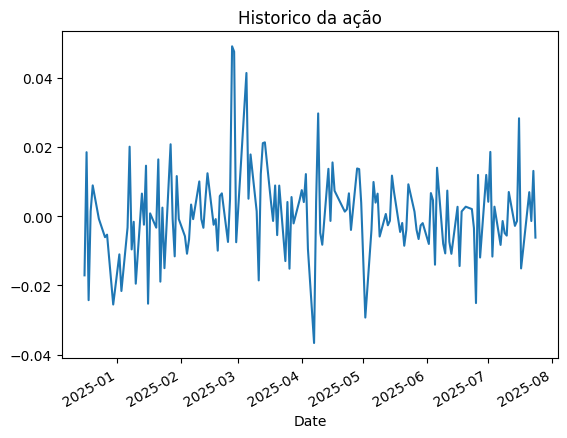

In [34]:
# plotagem 
tbl_cotacao_ibovespa.query("ticker=='ABEV3'")['Close_diff'].plot(kind='line', title='Historico da ação')

In [35]:
# teste de estacionariedade com diferenciacao do target
testar_estacionariedade_interativo(df= tbl_cotacao_ibovespa, coluna_valor = 'Close_diff')

interactive(children=(Dropdown(description='ticker', options=('ABEV3', 'ALOS3', 'ASAI3', 'AURE3', 'AZZA3', 'B3…

HTML(value='\n        <p>🔍 <strong>Teste ADF - Close_diff | Ticker: ABEV3</strong></p>\n        <ul>\n        …

In [36]:
# decomposicao da serie temporal diferenciada
grafico_decomposicao_temporal_interativo(df= tbl_cotacao_ibovespa, target = 'Close_diff', period=5)

In [37]:
# gráfico de autocorrelacao para definição do número de lags e médias móveis
grafico_acf_interativo(df=tbl_cotacao_ibovespa,coluna_valor = 'Close_diff',max_lags=30)

In [38]:
# gráfico de autocorrelacao parcial para definição do número de lags e médias móveis
grafico_pacf_interativo(df=tbl_cotacao_ibovespa,coluna_valor = 'Close_diff',max_lags=9)

In [39]:
# Considerações sobre colunas criadas para teste de modelo

In [40]:
# remoção de colunas para gerar dataset para validação de modelos
tbl_cotacao_ibovespa.drop(columns=['empresa','slug'], axis=1, inplace=True)

In [41]:
# renome das colunas para treinamento do modelo
dicionario = {"ticker":"acao", "Open":"abertura","High":"maximo", "Low":"minimo",
              "Close":"fechamento","Volume":"volume","Feriado":"feriado",
              "Close_diff":"close_diff", "lag_1_Close_diff":"lag_1_close_diff",
       "lag_2_Close_diff":"lag_2_close_diff", "lag_3_Close_diff":"lag_3_close_diff",
        "lag_5_Close_diff":"lag_5_close_diff",
       "rolling_mean_3_Close_diff":"rolling_mean_3_close_diff",
       "volatility_3_Close_diff":"volatility_3_close_diff",
       "retorno_acumulado_3_Close_diff":"retorno_acumulado_3_close_diff",
       "rolling_mean_5_Close_diff":"rolling_mean_5_close_diff",
       "volatility_5_Close_diff":"volatility_5_close_diff", 
       "retorno_acumulado_5_Close_diff":"retorno_acumulado_5_close_diff"}
tbl_cotacao_ibovespa.rename(columns=dicionario, inplace=True)

In [42]:
# salvar o dataset para treino e validação dos modelos
tbl_cotacao_ibovespa.to_csv('../data/processed/tbl_cotacao_ibovespa_processed.csv', index=True)

# Insights do Análise Exploratória 

# Recomendações de transformações para o Pipeline

Variáveis Numéricas:
    Normalização dos dados: Variabilidade maior que 3 desvios para dados com presença de valores zerados em alguns campos. Necessidade de aplicação de um power_transformer com método yeo-johnson.
    Escalonamento: Colunas com variação de grandeza nas escalas. Valores monetários combinados com valores decimais, etc.
    Feature Engineering: Criação das colunas de dados temporais para o index datetime. Transformação cíclica em formato dia útil para interpretação do modelo sobre o ciclo de datas. Aplicação de diferenciação no target para tratamento (suavização) de tendência. Construção de features de janela (lag, média móvel, desvio-padrão e valor acumulado) para interpretação do modelo. Esse processo será construído através de ETL Glue.


Variáveis Categóricas:
    Encoding: Aplicação de one-hot encoding para colunas com poucos valores categóricos.
    Feature Engineering: Aplicação de target encoding simples para coluna acao, pela quantidade de variáveis e pela representatividade de registros por categoria (mesma quantidade para todas).

# Recomendações de Transformações para o Pipeline

### Variáveis Numéricas

- **Normalização**: Foi observada alta variabilidade (maior que 3 desvios-padrão) em algumas colunas, com presença de valores zerados. Recomenda-se aplicar o `PowerTransformer` com o método *yeo-johnson* para ajustar a distribuição dessas variáveis.

- **Escalonamento**: Algumas colunas apresentam escalas muito distintas (ex: valores monetários vs. proporções decimais). Será aplicado `StandardScaler` para uniformizar a amplitude das variáveis e facilitar o aprendizado dos modelos.

- **Feature Engineering**:
  - Geração de colunas temporais a partir do índice `datetime`, incluindo marcações como dia da semana, fim de semana, feriado e dia útil.
  - Aplicação de codificação cíclica para atributos temporais (ex: dia do mês, dia da semana) a fim de preservar sua natureza periódica.
  - Diferenciação da variável target (primeira ordem) para suavizar tendências e preparar o dado para modelagem temporal.
  - Criação de variáveis derivadas com janelas móveis (lags, médias móveis, desvio-padrão e acumulados) para capturar padrões de dependência temporal.
  - Todas essas transformações serão integradas a um processo de ETL no AWS Glue.

---

### Variáveis Categóricas

- **Codificação (Encoding)**: Será utilizado *One-Hot Encoding* para variáveis com baixo número de categorias, garantindo interpretabilidade e boa performance nos modelos.

- **Feature Engineering**:
  - Aplicação de *Target Encoding* simples para a variável `acao`, devido ao número elevado de categorias e distribuição balanceada entre elas. Essa abordagem permite capturar a relação estatística entre a variável categórica e o target sem aumentar excessivamente a dimensionalidade.


Seu texto é uma análise técnica bem sólida e demonstra um bom entendimento das transformações que o pipeline de machine learning precisa. A clareza das suas recomendações é um ponto forte.

Aqui estão algumas sugestões para deixar o texto ainda mais claro e profissional, focando em melhorar a fluidez e a precisão da linguagem:

Sugestões de Melhoria
1. Organização e Clareza
Estrutura da Seção de Variáveis Numéricas: Você pode agrupar as recomendações de forma mais lógica. Por exemplo, começar com o tratamento de valores e depois passar para a criação de novas features.

Revisão do texto: Algumas frases podem ser simplificadas para facilitar a leitura. Por exemplo, em vez de "Variabilidade maior que 3 desvios para dados com presença de valores zerados em alguns campos", você poderia dizer "Normalização (Yeo-Johnson) para dados com alta variabilidade e a presença de zeros."

2. Adição de Detalhes Técnicos
Normalização: Mencionar o motivo para usar power_transformer com yeo-johnson é excelente. Você poderia adicionar por que ele é uma boa escolha quando há zeros, mostrando mais profundidade no seu conhecimento.

Escalonamento: Ser mais específico sobre qual técnica de escalonamento será usada (ex: StandardScaler ou MinMaxScaler) e o porquê dela ser a ideal para esses casos.

Feature Engineering: O texto já é ótimo, mas poderia detalhar um pouco mais as "colunas de dados temporais para o index datetime". Por exemplo: "Extração de features temporais do index datetime, como dia da semana, mês e ano, para capturar sazonalidade."

Target Encoding: O texto está bom, mas você pode reforçar o motivo da escolha. Dizer que ele ajuda a reduzir a dimensionalidade e a capturar a relação entre a feature e a variável alvo é uma boa prática.

Versão Otimizada
Aqui está uma versão reescrita com base nas sugestões, mantendo suas ideias centrais:

Recomendações de Transformações para o Pipeline

Variáveis Numéricas
Normalização: Para colunas com alta variabilidade e a presença de valores zero, será aplicado o PowerTransformer com o método Yeo-Johnson. Isso ajudará a estabilizar a variância e tornar a distribuição mais próxima da normal, um requisito para muitos modelos.

Escalonamento: Para garantir que todas as features numéricas tenham a mesma escala, será utilizado o StandardScaler. Isso é fundamental para modelos que são sensíveis à magnitude dos dados, como SVMs ou regressão linear, evitando que features com valores maiores dominem o processo de otimização.

Feature Engineering: Para enriquecer o conjunto de dados, serão criadas features de janela (lag, média móvel, desvio-padrão e valor acumulado) para capturar padrões e tendências. Além disso, o target será diferenciado para suavizar a tendência. Essas transformações serão implementadas via um processo de ETL Glue.

Variáveis Categóricas
Encoding: Colunas com poucos valores categóricos receberão o One-Hot Encoding para evitar a suposição de uma ordem entre as categorias. Para a coluna 'acao', devido à sua alta cardinalidade e à distribuição uniforme das categorias, será aplicado o Target Encoding para reduzir a dimensionalidade e capturar a relação com a variável alvo de forma mais eficiente.

In [43]:
tbl_cotacao_ibovespa.columns

Index(['acao', 'abertura', 'maximo', 'minimo', 'fechamento', 'volume', 'tipo',
       'setor', 'industria', 'dayofweek', 'month', 'feriado', 'day_sin',
       'day_cos', 'month_sin', 'month_cos', 'close_diff', 'lag_1_close_diff',
       'lag_3_close_diff', 'lag_5_close_diff', 'lag_7_Close_diff',
       'lag_15_Close_diff', 'lag_30_Close_diff', 'lag_60_Close_diff',
       'lag_90_Close_diff', 'rolling_mean_3_close_diff',
       'volatility_3_close_diff', 'retorno_acumulado_3_close_diff',
       'rolling_mean_5_close_diff', 'volatility_5_close_diff',
       'retorno_acumulado_5_close_diff', 'rolling_mean_7_Close_diff',
       'volatility_7_Close_diff', 'retorno_acumulado_7_Close_diff',
       'rolling_mean_15_Close_diff', 'volatility_15_Close_diff',
       'retorno_acumulado_15_Close_diff', 'rolling_mean_30_Close_diff',
       'volatility_30_Close_diff', 'retorno_acumulado_30_Close_diff',
       'rolling_mean_60_Close_diff', 'volatility_60_Close_diff',
       'retorno_acumulado_60_Close_